<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/proyecto_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea: Proyecto final
#Milton Gallardo
El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [44]:
filename ="/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
#transformar a numpy
df.to_numpy()
df.values

array([['FDA15', 9.3, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        3735.138],
       ['DRC01', 5.92, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        443.4228],
       ['FDN15', 17.5, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        2097.27],
       ...,
       ['NCJ29', 10.6, 'Low Fat', ..., 'Tier 2', 'Supermarket Type1',
        1193.1136],
       ['FDN46', 7.21, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        1845.5976],
       ['DRG01', 14.8, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        765.67]], dtype=object)

In [9]:
#Datos a limpiar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
#Datos faltante

df['Item_Weight'].isna().head()
y_missing = df['Item_Weight'].isna()
df.loc[y_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [11]:
#suma datos faltantes
df['Item_Weight'].isna().sum()

1463

In [13]:
#ingresando valores faltantes
df.loc[0:, 'Item_Weight']
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [400]:
#df.groupby(['Item_Type', 'Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()


,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


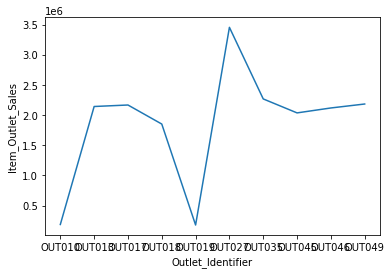

In [16]:
#df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
df1=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
sns.lineplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales')

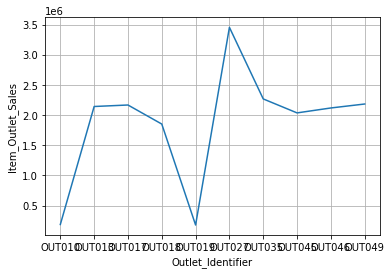

In [17]:
df1=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
sns.lineplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales').grid()

Text(0.5, 0, 'Outlet_Identifier')

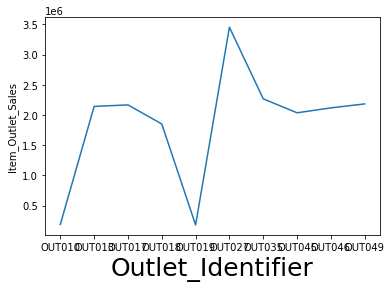

In [18]:
df1=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
sns.lineplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier', fontsize=25)


Text(0.5, 1.0, 'Sales by Outlet')

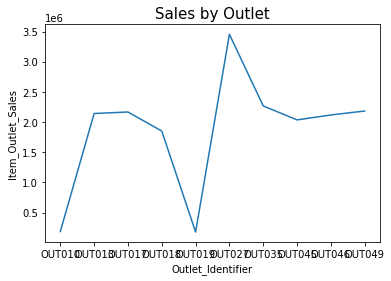

In [19]:
sns.lineplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.title('Sales by Outlet', fontsize=15)


Text(0, 0.5, 'Dollars')

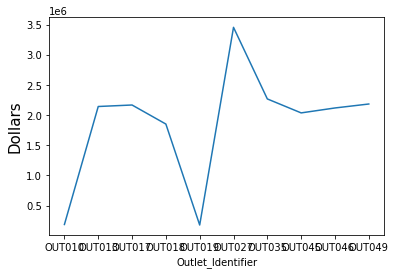

In [20]:
sns.lineplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.ylabel('Dollars', fontsize=15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

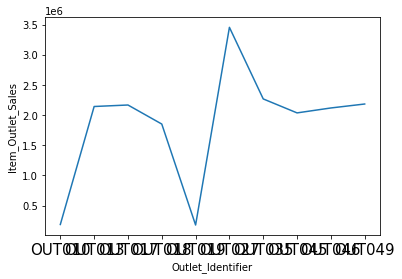

In [21]:
df1=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
sns.lineplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xticks(fontsize=15)

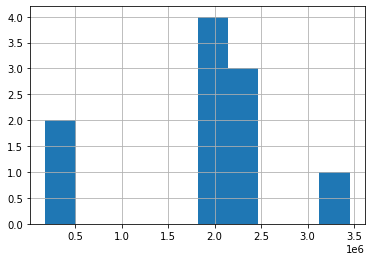

In [22]:
# Semana 4
# Traza un histograma de sales by outlet
df1['Item_Outlet_Sales'].hist()

In [26]:
#ventas por Item de producto & material requirements planning 

df.groupby(['Outlet_Identifier','Item_Type'])[['Item_Outlet_Sales','Item_MRP']].sum()



Item_Outlet_Sales    Item_MRP
Outlet_Identifier Item_Type                                   
OUT010            Baking Goods          10693.4138   5328.4502
                  Breads                 7657.3658   2632.9732
                  Breakfast              4081.3540   1510.9266
                  Canned                 9019.5926   4551.2196
                  Dairy                 15307.4078   6707.8562
...                                            ...         ...
OUT049            Others                47772.4816   2489.5288
                  Seafood               11827.2712    999.8264
                  Snack Foods          350244.0900  20891.9616
                  Soft Drinks           97585.6402   5734.2012
                  Starchy Foods         42019.9696   2540.6612

[160 rows x 2 columns]

In [28]:
#ventas por Outlet e Item MRP 
df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales','Item_MRP']].sum()


,Item_Outlet_Sales,Item_MRP
Outlet_Identifier,,
OUT010,1.883402e+05,78131.5646
OUT013,2.142664e+06,131809.0156
OUT017,2.167465e+06,129103.9564
OUT018,1.851823e+06,131477.7724
OUT019,1.796941e+05,73807.5824
OUT027,3.453926e+06,130714.6746
OUT035,2.268123e+06,133103.9070
OUT045,2.036725e+06,130942.7782
OUT046,2.118395e+06,132113.3698


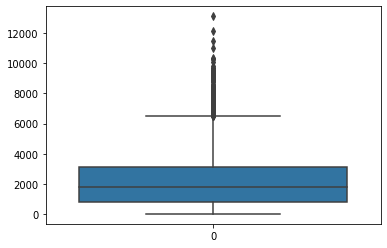

In [29]:
#sns.boxplot(data=[df['Item_Outlet_Sales'],df['Item_Type']])
sns.boxplot(data=[df['Item_Outlet_Sales']])

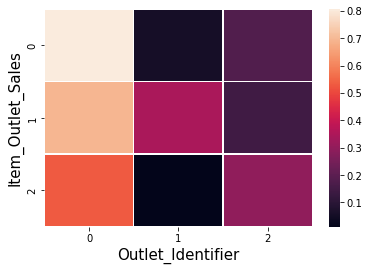

In [30]:
# Matriz de confusion
df = np.random.rand(3, 3)
ax = sns.heatmap(df, linewidth=0.3)
plt.xlabel('Outlet_Identifier', fontsize=15)
plt.ylabel('Item_Outlet_Sales', fontsize=15)
plt.show()

In [ ]:
# Semana 5


In [320]:
# obteniendo las columnas solicitadas en la tarea
df.loc[:, ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']].head()
data3=df.loc[:, ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']].head()
data3

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.016047,249.8092,1999,3735.1380
1,0.019278,48.2692,2009,443.4228
2,0.016760,141.6180,1999,2097.2700
3,0.000000,182.0950,1998,732.3800
4,0.000000,53.8614,1987,994.7052


In [321]:
data3.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,0.083296,0.749397,0.392362
Item_MRP,0.083296,1.000000,0.022252,0.770601
Outlet_Establishment_Year,0.749397,0.022252,1.000000,-0.081681
Item_Outlet_Sales,0.392362,0.770601,-0.081681,1.000000


In [322]:
data3.corr().sort_values(by = ['Item_Outlet_Sales'])

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Establishment_Year,0.749397,0.022252,1.000000,-0.081681
Item_Visibility,1.000000,0.083296,0.749397,0.392362
Item_MRP,0.083296,1.000000,0.022252,0.770601
Item_Outlet_Sales,0.392362,0.770601,-0.081681,1.000000


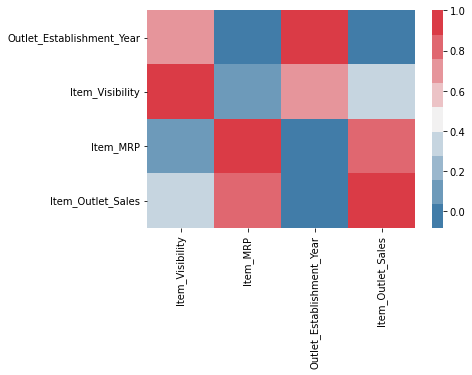

In [323]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(data3.corr().sort_values(by = ['Item_Outlet_Sales']), cmap = sns.diverging_palette(240, 10, n=9))

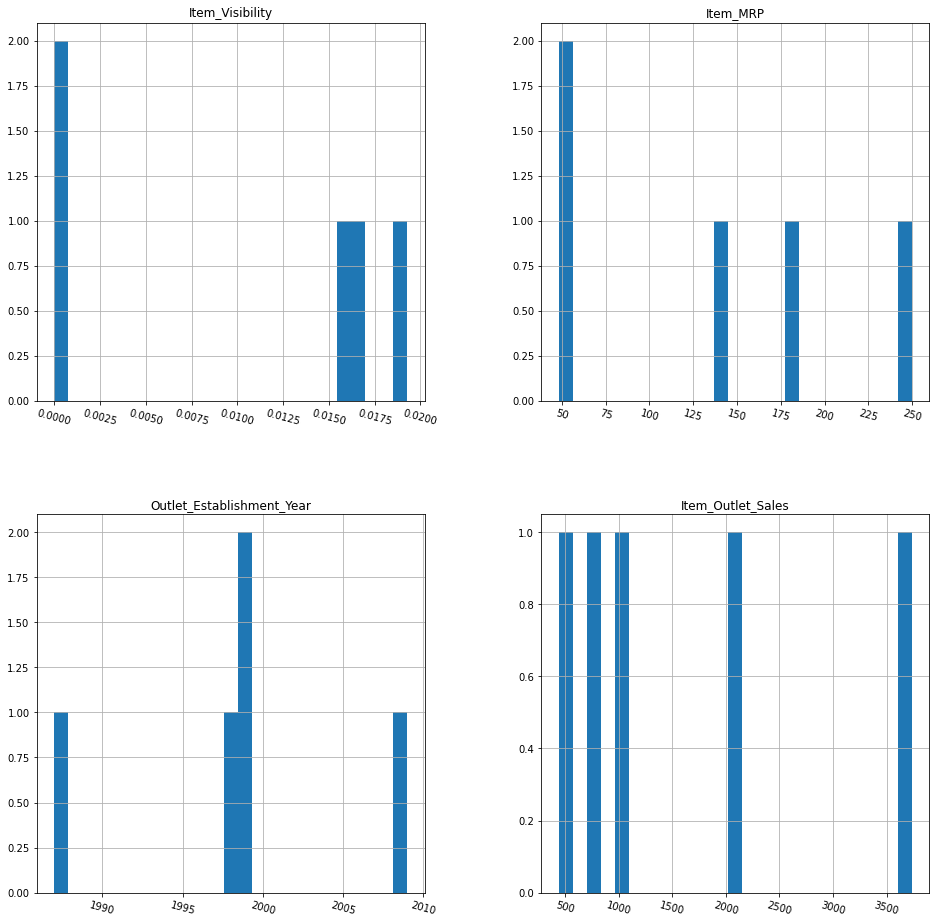

In [324]:
data3.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [325]:
salesFilter = data3.loc[:, 'Item_Outlet_Sales'] < 0 
df_salesfilter = data3.loc[~salesFilter, :]

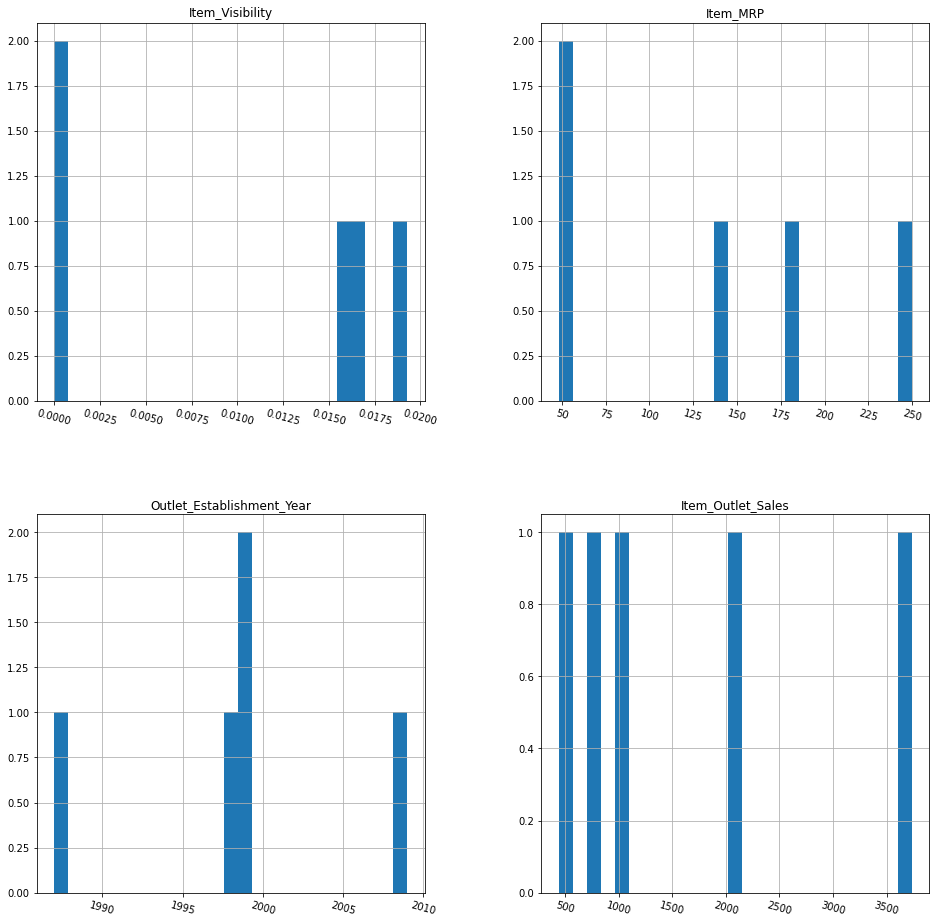

In [326]:
data3.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

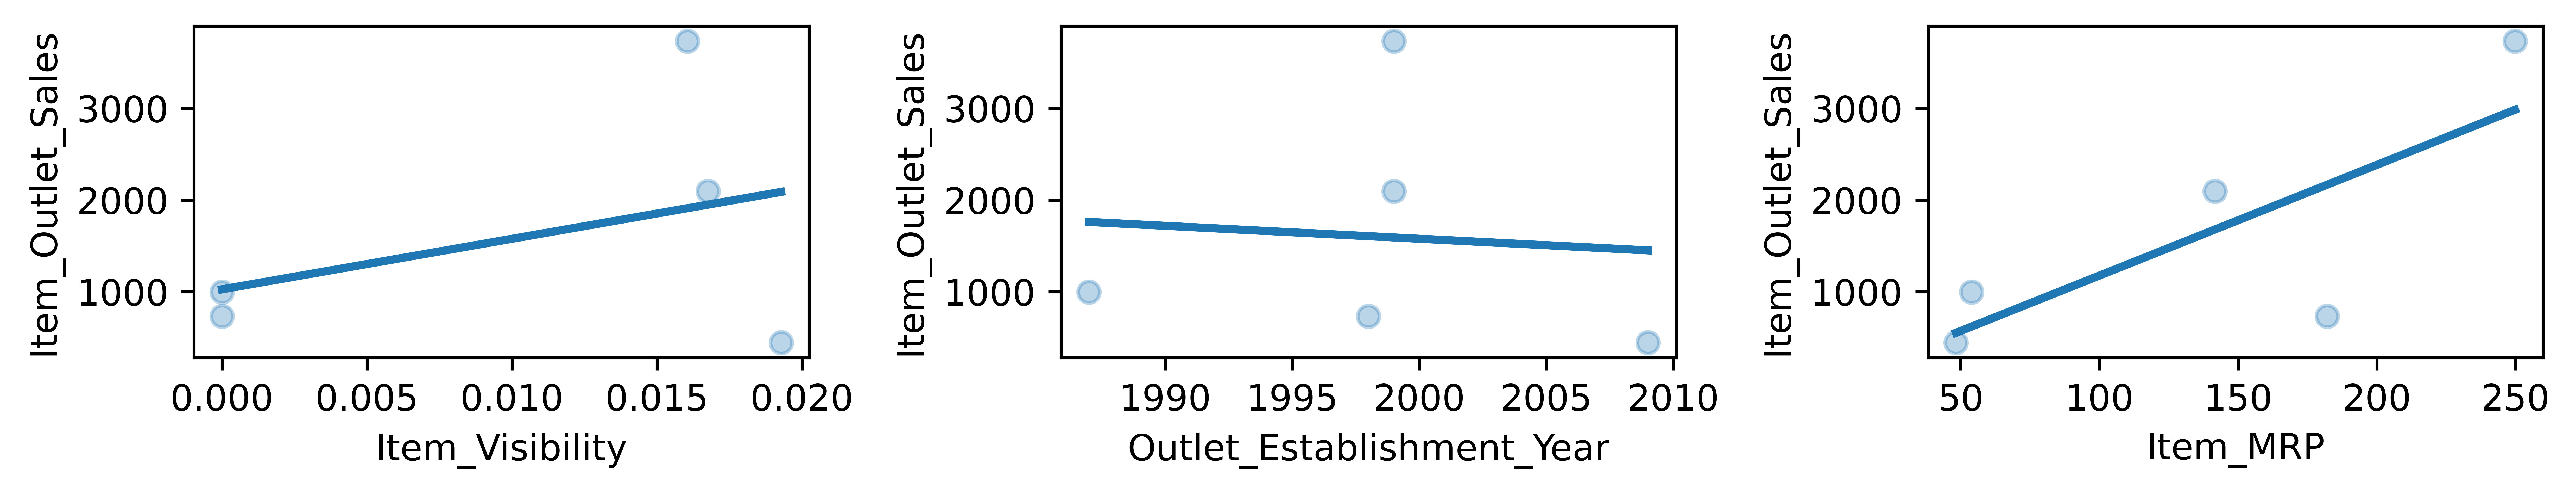

In [328]:
#You can use seaborn to see if you have linear relationships between each feature variable and the target
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=data3, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data3, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=data3, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()


# Proyeto Final 1

In [329]:
data3

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.016047,249.8092,1999,3735.1380
1,0.019278,48.2692,2009,443.4228
2,0.016760,141.6180,1999,2097.2700
3,0.000000,182.0950,1998,732.3800
4,0.000000,53.8614,1987,994.7052


In [330]:
data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Visibility            5 non-null      float64
 1   Item_MRP                   5 non-null      float64
 2   Outlet_Establishment_Year  5 non-null      int64  
 3   Item_Outlet_Sales          5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 288.0 bytes


In [331]:
data3.shape


(5, 4)

In [378]:
# primero extraigo los nombres de nuestras variables
colnames=data3.columns.values.tolist()
predictors=colnames[:3]
target=colnames[3]
X=data3[predictors]
Y=data3[target]

In [376]:
X

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.016047,249.8092,1999
1,0.019278,48.2692,2009
2,0.016760,141.6180,1999
3,0.000000,182.0950,1998
4,0.000000,53.8614,1987


In [379]:
Y

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [380]:
from sklearn.tree import DecisionTreeRegressor 
regtree=DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10,max_depth=5,random_state=0)

In [381]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [382]:
from sklearn.tree import export_text 
text=export_text(regtree)
print(text)


|--- value: [1600.58]



In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

fig=plt.figure(figsize=(25,20))
_= tree.plot_tree(regtree,
                  feature_names=data3.columns[:2],
                  class_names=data3.columns[3],
                  filled=True)

In [371]:
preds=regtree.predict(data3[predictors])

In [372]:
data3["preds"]=preds


In [384]:
data3[["preds","Item_Outlet_Sales"]]

,preds,Item_Outlet_Sales
0,1600.5832,3735.1380
1,1600.5832,443.4228
2,1600.5832,2097.2700
3,1600.5832,732.3800
4,1600.5832,994.7052


In [397]:
from logging import error
#sacamos el error  cuadratico medio
data3["error2"]=(data3["preds"]-data3["Item_Outlet_Sales"])**2


In [399]:
sum(data3["error2"])/len(data3)

1452581.4220399358

In [363]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

In [364]:
forest= RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=1000)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=1000, n_jobs=2, oob_score=True)

In [386]:
data3["rforest_pred"]=forest.oob_prediction_
data3[["rforest_pred","Item_Outlet_Sales"]]

,rforest_pred,Item_Outlet_Sales
0,1654.956867,3735.1380
1,2145.447858,443.4228
2,1178.523896,2097.2700
3,2637.689347,732.3800
4,1352.078394,994.7052


In [389]:
data3["error2_f"]=(data3["rforest_pred"]-data3["Item_Outlet_Sales"])**2

In [390]:
sum(data3["error2_f"])/len(df)

1387.5462347835337

In [391]:
list(zip(predictors, forest.feature_importances_))

[('Item_Visibility', 0.1638757467278901),
 ('Item_MRP', 0.6318236981451513),
 ('Outlet_Establishment_Year', 0.20430055512695863)]

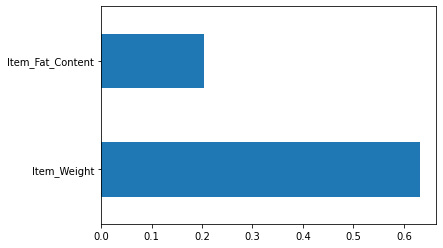

In [393]:
feat_importances=pd.Series(forest.feature_importances_,index=df.columns[0:3])
feat_importances.nlargest(2).plot(kind='barh')